<a href="https://colab.research.google.com/github/mariacmartins/bioinformatica-disciplina/blob/main/Aula_10_mapeamento_de_leituras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapeamento de leituras
No mapeamento de leituras, cada leitura presente no dataset é alinhada (mapeada) na sequência de referência para se identificar a região do genoma que a originou. 
Este alinhamento é muito similar ao realizado por ferramentas como o BLAST, mas tem suas particularidades.

No processo de identificação de variantes com NGS, por exemplo, o resultado deste alinhamento é processado de modo a se identificar posições do genoma onde há divergência entre o genoma de interesse e o genoma de referência. Além disso, para análise de variantes é importante reduzir ao máximo o número de artefatos de alinhamento, visto que estes podem levar à resultados falsos negativos e falsos positivos. 


**Formatos de arquivos de alinhamento (NGS):**
- FASTQ: formato baseado em texto para armazenar uma sequência biológica e seus índices correspondentes de qualidade. 
- SAM: formato padrão para alinhamento de sequências (headers + tabular)
- BAM: versão binária e compactada do formato SAM.
- BAI: indexação do formato BAM.

In [1]:
!apt install sra-toolkit bwa samtools ncbi-entrez-direct 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  blends-common cwltool libauthen-sasl-perl libc-ares2 libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhts2 libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl libjs-bootstrap
  libkdf5-2 liblwp-mediatypes-perl liblwp-protocol-https-perl libmagic-mgc
  libmagic1 libmailtools-perl libmbedcrypto1 libmbedtls10 libncbi-vdb2
  libncbi-wvdb2 libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl
  libtimedate-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl med-conf

### SARS-Cov-2
Baixe o genoma do vírus **SARS-Cov-2 isolado Wuhan-Hu-1** do GenBank (GenBank: NC_045512.2), que servirá como **referência**.

In [2]:
!efetch -db nucleotide -id NC_045512.2 -format fasta > NC_045512.2.fasta

In [3]:
!head -10 NC_045512.2.fasta

>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC
GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT


Baixe os dados brutos de sequenciamento de **um novo isolado de SARS-Cov-2 obtido na Espanha** (SRA: ERR5908782).

Obs: estes dados foram obtidos com Illumina MiSeq e usando uma biblioteca paired-end. 

In [4]:
!fastq-dump --split-3 ERR5908782

Rejected 48 READS because of filtering out non-biological READS
Read 153205 spots for ERR5908782
Written 153205 spots for ERR5908782


Realize o **mapeamento das leituras** utilizando as ferramentas **BWA e Samtools** e gere um **relatório de cobertura** das leituras mapeadas contra a referência.

In [5]:
!bwa index -p sarscov2 NC_045512.2.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p sarscov2 NC_045512.2.fasta
[main] Real time: 0.060 sec; CPU: 0.023 sec


In [6]:
!bwa aln sarscov2 ERR5908782_1.fastq > ERR5908782_1.sai

[bwa_aln] 17bp reads: max_diff = 2
[bwa_aln] 38bp reads: max_diff = 3
[bwa_aln] 64bp reads: max_diff = 4
[bwa_aln] 93bp reads: max_diff = 5
[bwa_aln] 124bp reads: max_diff = 6
[bwa_aln] 157bp reads: max_diff = 7
[bwa_aln] 190bp reads: max_diff = 8
[bwa_aln] 225bp reads: max_diff = 9
[bwa_aln_core] calculate SA coordinate... 4.74 sec
[bwa_aln_core] write to the disk... 0.03 sec
[bwa_aln_core] 153157 sequences have been processed.
[main] Version: 0.7.17-r1188
[main] CMD: bwa aln sarscov2 ERR5908782_1.fastq
[main] Real time: 5.222 sec; CPU: 5.163 sec


In [7]:
!bwa aln sarscov2 ERR5908782_2.fastq > ERR5908782_2.sai

[bwa_aln] 17bp reads: max_diff = 2
[bwa_aln] 38bp reads: max_diff = 3
[bwa_aln] 64bp reads: max_diff = 4
[bwa_aln] 93bp reads: max_diff = 5
[bwa_aln] 124bp reads: max_diff = 6
[bwa_aln] 157bp reads: max_diff = 7
[bwa_aln] 190bp reads: max_diff = 8
[bwa_aln] 225bp reads: max_diff = 9
[bwa_aln_core] calculate SA coordinate... 4.70 sec
[bwa_aln_core] write to the disk... 0.01 sec
[bwa_aln_core] 153157 sequences have been processed.
[main] Version: 0.7.17-r1188
[main] CMD: bwa aln sarscov2 ERR5908782_2.fastq
[main] Real time: 5.055 sec; CPU: 5.006 sec


In [8]:
!bwa sampe sarscov2 ERR5908782_1.sai ERR5908782_2.sai ERR5908782_1.fastq ERR5908782_2.fastq > alignment.sam

[bwa_sai2sam_pe_core] convert to sequence coordinate... 
[infer_isize] (25, 50, 75) percentile: (94, 138, 198)
[infer_isize] low and high boundaries: 200 and 406 for estimating avg and std
[infer_isize] inferred external isize from 36138 pairs: 257.792 +/- 44.163
[infer_isize] skewness: 0.730; kurtosis: -0.318; ap_prior: 1.00e-05
[infer_isize] inferred maximum insert size: 483 (5.11 sigma)
[bwa_sai2sam_pe_core] time elapses: 0.97 sec
[bwa_sai2sam_pe_core] changing coordinates of 44 alignments.
[bwa_sai2sam_pe_core] align unmapped mate...
[bwa_paired_sw] 751 out of 2000 Q17 singletons are mated.
[bwa_paired_sw] 2 out of 112165 Q17 discordant pairs are fixed.
[bwa_sai2sam_pe_core] time elapses: 3.13 sec
[bwa_sai2sam_pe_core] refine gapped alignments... 0.60 sec
[bwa_sai2sam_pe_core] print alignments... 0.82 sec
[bwa_sai2sam_pe_core] 153157 sequences have been processed.
[main] Version: 0.7.17-r1188
[main] CMD: bwa sampe sarscov2 ERR5908782_1.sai ERR5908782_2.sai ERR5908782_1.fastq ERR590

In [9]:
!head -10 alignment.sam

@SQ	SN:NC_045512.2	LN:29903
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa sampe sarscov2 ERR5908782_1.sai ERR5908782_2.sai ERR5908782_1.fastq ERR5908782_2.fastq
ERR5908782.1	81	NC_045512.2	13654	37	83M	=	13654	-83	GTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACA	GGGFGGGGGGGFGGGFCGDGGGGGGGFGGGGGGGDGGFFEGGGGFGGGGGGGGGGGFGF@GGGGGGGGGGGGGGGGGGCCCCC	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:83
ERR5908782.1	161	NC_045512.2	13654	37	83M	=	13654	83	GTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACA	CCCCCGGFFEEGGGGGCEFFGGFGGA8CEEF,EAFFGFEFGGGGFEGFGGGGGGGGFGGGF<FGDGFGGGGFEGDGGCGGDEF	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:83
ERR5908782.2	99	NC_045512.2	23284	60	195M	=	23315	231	TGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGGTGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGG	GGGGGA

In [10]:
!samtools view -S -b -o alignment.bam alignment.sam

In [11]:
!samtools sort -o alignment.sorted.bam alignment.bam

In [12]:
!samtools depth alignment.sorted.bam > coverage.txt

In [13]:
!head -10 coverage.txt

NC_045512.2	38	1
NC_045512.2	39	4
NC_045512.2	40	7
NC_045512.2	41	7
NC_045512.2	42	12
NC_045512.2	43	14
NC_045512.2	44	14
NC_045512.2	45	14
NC_045512.2	46	15
NC_045512.2	47	15


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_coverage = pd.read_csv('coverage.txt', names=['CHROM', 'POS', 'COVERAGE'], sep='\t')
df_coverage.head(10)

,CHROM,POS,COVERAGE
0,NC_045512.2,38,1
1,NC_045512.2,39,4
2,NC_045512.2,40,7
3,NC_045512.2,41,7
4,NC_045512.2,42,12
5,NC_045512.2,43,14
6,NC_045512.2,44,14
7,NC_045512.2,45,14
8,NC_045512.2,46,15
9,NC_045512.2,47,15


In [16]:
df_coverage['COVERAGE'].min()

1

In [17]:
df_coverage['COVERAGE'].max()

4737

In [18]:
df_coverage['COVERAGE'].mean()

1395.2373927038627

In [19]:
df_coverage['COVERAGE'].median()

1360.0

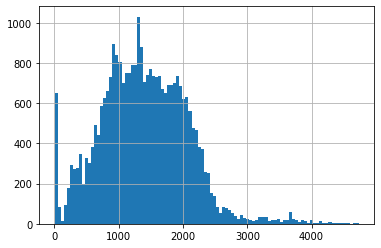

In [20]:
df_coverage['COVERAGE'].hist(bins=100)

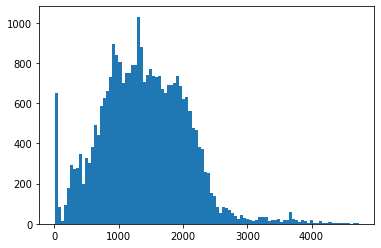

In [21]:
plt.hist(df_coverage['COVERAGE'], bins=100);